In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset, random_split

from torchvision.datasets import CIFAR10
from torchvision import transforms as T

import matplotlib.pyplot as plt

from models import *
from utils import *
from train import train
from groups import *

##### Data

In [2]:
batch_size = 128

In [3]:
train_subset, val_subset = random_split(
    CIFAR10('./data/', train=True, transform = T.Compose([T.ToTensor(), T.Normalize(.5, .5)]), download=True), 
    [45000, 5000]
)
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, drop_last=True)

Files already downloaded and verified


In [4]:
test_set = CIFAR10('./data/', train=False, transform = T.Compose([T.ToTensor(), T.Normalize(.5, .5)]), download=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True, drop_last=True)

Files already downloaded and verified


##### CNN

In [5]:
cnnmodel = CNN(
    [3, 16, 32, 64, 128], 
    3, 
    [0, 1, 1, 1], 
    (128,10)
)
print(cnnmodel.n_params)

98730


In [ ]:
train_loss, reg_loss, train_acc, val_loss, val_acc = train(
    cnnmodel,
    optim.Adam,
    nn.CrossEntropyLoss(),
    50,
    1e-3,
    train_loader, 
    val_loader,
    reg_str = 1e-1,
    reg_ord = 2
)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/351 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/351 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

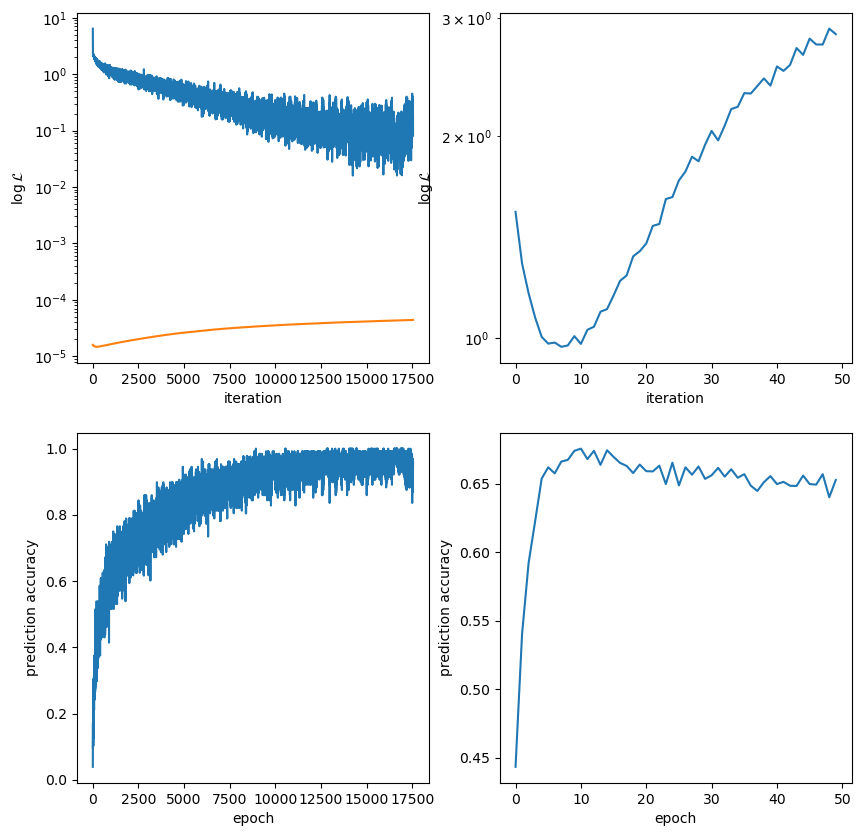

In [17]:
_, _ = plot_losses(train_loss, reg_loss, val_loss, train_acc, val_acc)

In [20]:
calc_accuracy(cnnmodel, test_loader)

tensor(0.6989)

##### p4CNN

In [ ]:
p4model = GroupCNN(
    group=C4,
    channels=[3, 8, 16, 32, 64],
    kernel_sizes=3,
    paddings=[0, 1, 1, 1],
    pooling_kernels=[(1,2,2), (1,2,2), (1,2,2), (4,2,2)],
    pooling_strides=[(1,2,2), (1,2,2), (1,2,2), (1,2,2)],
    pooling_paddings=[(0,0,0), (0,0,0), (0,0,0), (0,0,0)],
    output_dims=(64,10)
)
print(p4model.n_params)

In [ ]:
train_loss, reg_loss, train_acc, val_loss, val_acc = train(
    p4model,
    optim.Adam,
    nn.CrossEntropyLoss(),
    50,
    1e-3,
    train_loader, 
    val_loader,
    reg_str = 1e-1,
    reg_ord = 2
)

In [ ]:
_, _ = plot_losses(train_loss, reg_loss, val_loss, train_acc, val_acc)

In [19]:
calc_accuracy(p4model, test_loader)

tensor(0.7065)

##### p4mCNN

In [ ]:
p4mmodel = GroupCNN(
    group=D4,
    channels=[3, 4, 8, 32, 32],
    kernel_sizes=3,
    paddings=[0, 1, 1, 1],
    pooling_kernels=[(1,2,2), (1,2,2), (1,2,2), (8,2,2)],
    pooling_strides=[(1,2,2), (1,2,2), (1,2,2), (1,2,2)],
    pooling_paddings=[(0,0,0), (0,0,0), (0,0,0), (0,0,0)],
    output_dims=(32,10)
)
print(p4mmodel.n_params)

In [ ]:
train_loss, reg_loss, train_acc, val_loss, val_acc = train(
    p4mmodel,
    optim.Adam,
    nn.CrossEntropyLoss(),
    50,
    1e-3,
    train_loader, 
    val_loader,
    reg_str = 1e-1,
    reg_ord = 2
)

In [ ]:
_, _ = plot_losses(train_loss, reg_loss, val_loss, train_acc, val_acc)

In [18]:
calc_accuracy(p4mmodel, test_loader)

tensor(0.6493)